In [2]:
from PIL import Image
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [31]:
import os
os.chdir('C:\\Users\\niroop.sugunaraj\\Documents\\Avhishek\\HeatLossProject')
image_list = []
for files in os.listdir('ds\\img'):
    image_list.append(files)

In [4]:
# image_list

# Loading Image to RGB

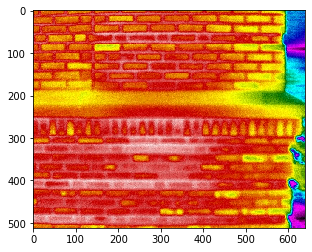

In [32]:
filename = "Mesuem_Tryout 2.jpg"
image = cv2.imread(filename)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [33]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values)

[[  0.  77. 212.]
 [ 10. 101. 234.]
 [  0.  71. 201.]
 ...
 [245.   2. 237.]
 [243.   7. 239.]
 [239.   5. 237.]]


In [34]:
pixel_values.shape

(327680, 3)

In [35]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.1)

In [36]:
# number of clusters (K)
k = 6
import time
start = time.time()
compactness, labels, centers = cv2.kmeans(pixel_values, k, None,criteria, 10, cv2.KMEANS_PP_CENTERS)
end = time.time()
print("Time consumed in working: ",end - start)

Time consumed in working:  0.8377454280853271


In [37]:
# convert back to 8 bit values
centers = np.uint8(centers)
print(centers)
# flatten the labels array
labels = labels.flatten()
# print(labels)

[[  5 111 225]
 [ 15  32 203]
 [207 136  14]
 [110 102 224]
 [  6 208 235]
 [ 14 149  64]]


In [38]:
print(set(labels))
print(len(labels))

{0, 1, 2, 3, 4, 5}
327680


In [39]:
compactness

540262422.3434627

In [40]:
segmented_image = centers[labels]
segmented_image

array([[  5, 111, 225],
       [  5, 111, 225],
       [ 15,  32, 203],
       ...,
       [110, 102, 224],
       [110, 102, 224],
       [110, 102, 224]], dtype=uint8)

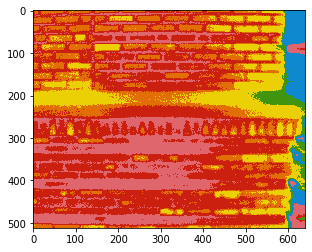

In [44]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))

# 

In [15]:
os.getcwd()

'C:\\Users\\niroop.sugunaraj\\Documents\\Avhishek\\HeatLossProject'

In [16]:
try:
    os.mkdir('kmean-output')
except FileExistsError:
    print("File already exists so just saving them in that folder")
    pass
    
os.chdir('kmean-output')
os.getcwd()

'C:\\Users\\niroop.sugunaraj\\Documents\\Avhishek\\HeatLossProject\\kmean-output'

In [17]:
cv2.imwrite(filename, segmented_image)

True

# Masking the hotspot

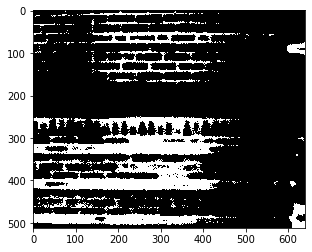

In [62]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
clusters = [0,1,2,4,5]
for i in clusters:
    masked_image[labels == i] = [0,0,0]
masked_image[labels == 3] = [255,255,255]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))

In [64]:
# masked_image.shape
# test = masked_image[0][1]
# test2 = [0,0,0]
          
# for i in range(512):
#     for y in range(640):
#           #print(masked_image[i][y])
#           if((masked_image[i][y] != test2).all()):
#               masked_image[i][y] == [255,255,255]

# plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))